In [1]:
import pandas as pd
import numpy as np

In [5]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [6]:
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'], ['Apple', 'Beer', 'Rice'], ['Apple', 'Beer'], ['Apple', 'Bananas'], ['Milk', 'Beer', 'Rice', 'Chicken'], ['Milk', 'Beer', 'Rice'], ['Milk', 'Beer'], ['Apple', 'Bananas']]

In [9]:
te=TransactionEncoder()
te_array=te.fit(dataset).transform(dataset)
te_array

array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [10]:
te_array.astype(int)

array([[1, 0, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 0]])

In [12]:
te.columns_

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']

In [13]:
pd.DataFrame(te_array, columns=te.columns_)

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [14]:
te.inverse_transform(te_array)

[['Apple', 'Beer', 'Chicken', 'Rice'],
 ['Apple', 'Beer', 'Rice'],
 ['Apple', 'Beer'],
 ['Apple', 'Bananas'],
 ['Beer', 'Chicken', 'Milk', 'Rice'],
 ['Beer', 'Milk', 'Rice'],
 ['Beer', 'Milk'],
 ['Apple', 'Bananas']]

In [15]:
dataset=[['사과','치즈','생수'],['생수','딸기','치즈','고등어'],['수박','사과','생수'],['생수','딸기','치즈','감자']]

In [18]:
te=TransactionEncoder()
te_array=te.fit(dataset).transform(dataset)
df=pd.DataFrame(te_array, columns=te.columns_)
df

,감자,고등어,딸기,사과,생수,수박,치즈
0,False,False,False,True,True,False,True
1,False,True,True,False,True,False,True
2,False,False,False,True,True,True,False
3,True,False,True,False,True,False,True


In [21]:
freq_items=apriori(df, min_support=0.5, use_colnames=True)
freq_items

,support,itemsets
0,0.50,(딸기)
1,0.50,(사과)
2,1.00,(생수)
3,0.75,(치즈)
4,0.50,"(딸기, 생수)"
5,0.50,"(딸기, 치즈)"
6,0.50,"(생수, 사과)"
7,0.75,"(치즈, 생수)"
8,0.50,"(딸기, 치즈, 생수)"


In [20]:
from mlxtend.frequent_patterns import association_rules

In [24]:
association_rules(freq_items, metric="confidence", min_threshold=0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(딸기),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
1,(생수),(딸기),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
2,(딸기),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
3,(치즈),(딸기),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
4,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
5,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
6,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
7,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
8,"(딸기, 치즈)",(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
9,"(딸기, 생수)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf


In [25]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], ['Milk', 'Apple', 'Kidney Beans', 'Eggs'], ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'], ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [26]:
te=TransactionEncoder()
te_array=te.fit(dataset).transform(dataset)
df=pd.DataFrame(te_array, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [27]:
freq_items=apriori(df, min_support=0.6, use_colnames=True)
freq_items

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


In [29]:
freq_items['length']=freq_items['itemsets'].apply(lambda x:len(x))
freq_items

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Eggs, Kidney Beans)",2
6,0.6,"(Onion, Eggs)",2
7,0.6,"(Milk, Kidney Beans)",2
8,0.6,"(Onion, Kidney Beans)",2
9,0.6,"(Yogurt, Kidney Beans)",2


In [41]:
freq_items[(freq_items['length']==2) & (freq_items['support']>=0.8)]

,support,itemsets,length
5,0.8,"(Eggs, Kidney Beans)",2


In [42]:
freq_items[freq_items['itemsets']=={'Onion', 'Eggs'}]

,support,itemsets,length
6,0.6,"(Onion, Eggs)",2


In [44]:
ohtArrat=te.fit(dataset).transform(dataset, sparse=True)
sparsedf=pd.DataFrame.sparse.from_spmatrix(ohtArrat, columns=te.columns_)
sparsedf

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [47]:
data=pd.read_csv("Market_Basket_Optimisation.csv", header=None)
data.shape

(7501, 20)

In [48]:
import matplotlib.pyplot as plt
import seaborn as nsns
from wordcloud import WordCloud

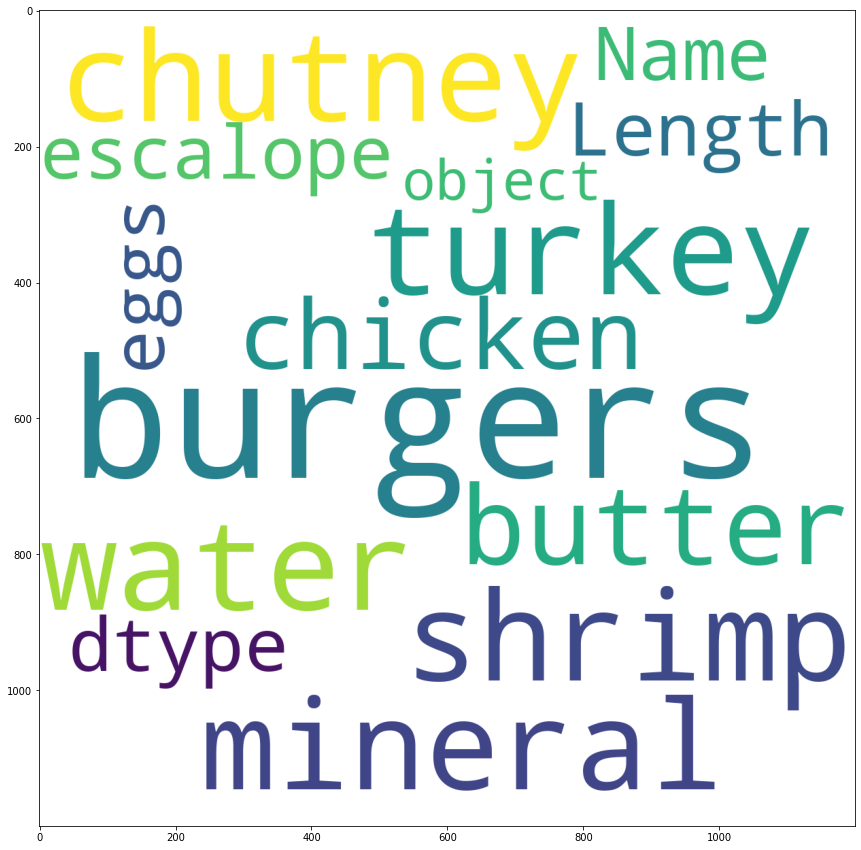

In [50]:
plt.rcParams['figure.figsize']=(15,15)
wordcloud=WordCloud(background_color='white', width=1200, height=1200, max_words=120).generate(str(data[0]))
plt.imshow(wordcloud)

<AxesSubplot:>

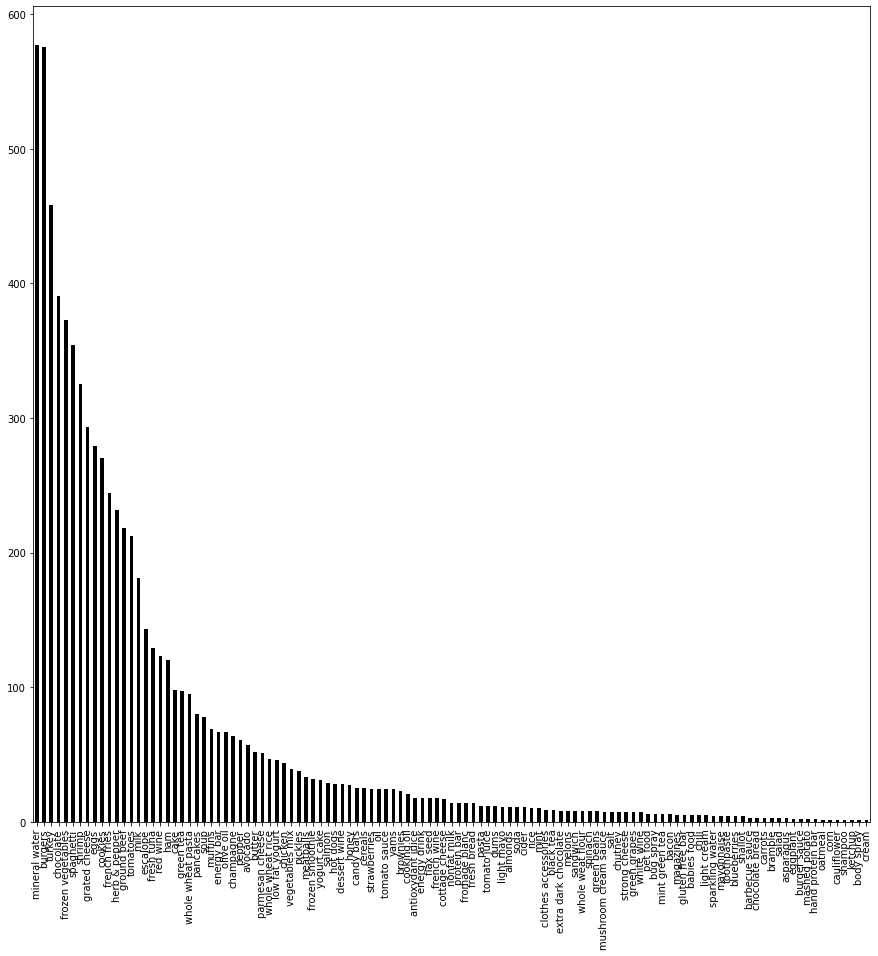

In [53]:
data[0].value_counts().plot.bar(color=plt.cm.copper(np.linspace(0,1,len(data[0]))))